In [1]:
import os;os.environ["TF_USE_LEGACY_KERAS"]="1"
import tensorflow as tf
from tensorflow.keras import layers             # type: ignore
import numpy as np

In [2]:
model = tf.keras.Sequential()
model.add(layers.Dense(4, input_dim=2, activation='sigmoid', name='input'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

<img src="model.png" alt="XOR model" width="500px" />

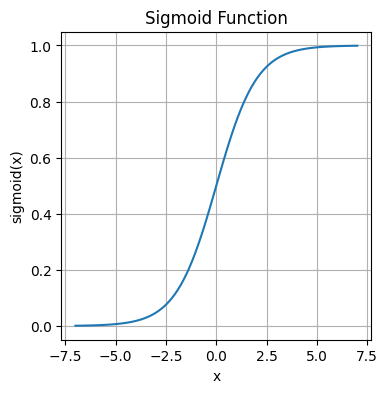

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

import matplotlib.pyplot as plt
x = np.linspace(-7, 7, 100)
plt.figure(figsize=(4, 4))
plt.plot(x, sigmoid(x))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid()
plt.show()

In [3]:
model.compile(
  loss='binary_crossentropy', 
  optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=1.0),
  metrics=['accuracy'])

In [4]:
training_data = np.array([[0,0], [0,1], [1,0], [1,1]])
target_data   = np.array([  [0],   [1],   [1],   [0]])

In [5]:
epochs = 1000
model.fit(training_data, target_data, epochs=epochs)

Epoch 1/1000
1/1 [==============================] - 19s 19s/step - loss: 0.6939 - accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.6929 - accuracy: 0.5000
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 11/1000
1/

In [6]:
model.predict(training_data)

1/1 [==============================] - 0s 297ms/step


array([[0.00476582],
       [0.9909986 ],
       [0.98864555],
       [0.01473192]], dtype=float32)

In [7]:
# print weights and biases
for layer in model.layers:
  print(layer.get_weights())


[array([[ 5.242755 , -3.7075388,  5.6572275, -4.2694488],
       [-3.782305 , -4.1126337, -6.728025 ,  2.684432 ]], dtype=float32), array([ 1.766827  ,  0.81488335, -2.7186596 , -1.2000217 ], dtype=float32)]
[array([[-6.406093 ],
       [-4.507476 ],
       [10.151923 ],
       [ 5.1196136]], dtype=float32), array([1.4407917], dtype=float32)]


In [8]:
# save model as tflite file
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
filename = "../../Code/03_XOR/model_xor.tflite"
open(filename, "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/yk/81mgpql17txc1f4grnlsknyc0000r9/T/tmp3115ltlb/assets


INFO:tensorflow:Assets written to: /var/folders/yk/81mgpql17txc1f4grnlsknyc0000r9/T/tmp3115ltlb/assets
W0000 00:00:1715096590.667851 2178625 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1715096590.667887 2178625 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2024-05-07 17:43:10.668410: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/yk/81mgpql17txc1f4grnlsknyc0000r9/T/tmp3115ltlb
2024-05-07 17:43:10.669520: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-05-07 17:43:10.669536: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/yk/81mgpql17txc1f4grnlsknyc0000r9/T/tmp3115ltlb
2024-05-07 17:43:10.679323: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-05-07 17:43:10.680193: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2024-05-07 17:43:1

1784

In [9]:
# file size of model
import os
statinfo = os.stat(filename)
print(f"File size of {filename}: {statinfo.st_size} bytes")

File size of ../../Code/03_XOR/model_xor.tflite: 1784 bytes
